In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from starkhelium import *
from scipy.constants import h, hbar, c, alpha, m_e, e, epsilon_0, atomic_mass, pi, physical_constants
a_0 = physical_constants['Bohr radius'][0]

In [33]:
def count_oscillations(data):
    deriv = np.diff(data)
    osc_count = 0
    curr_grad = deriv[0]
    for grad in deriv[1:]:
        if grad*curr_grad < 0:
            osc_count += 1
        curr_grad = grad
    return osc_count/2

Constant g:  49.5 oscillations


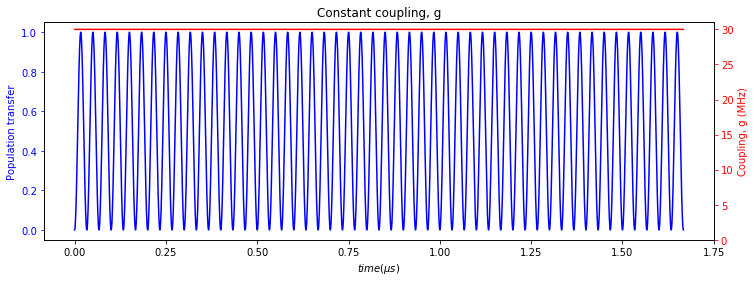

In [34]:
# Constant g
v = 3000
l = 5 *10**-3
t = l/v
g_max = 30 *10**6
steps = 5000

g_arr = g_max*np.ones(steps)
t_arr = np.linspace(0,t,steps)
pop_transfer = (np.cos(2*pi*t_arr*g_arr + pi)+1)/2

fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(t_arr*10**6, pop_transfer, 'b')
ax1.set_xlabel('$time (\mu s)$')
ax1.set_ylabel('Population transfer', color='b')
ax1.tick_params('y', colors='b')
ax1.set_title('Constant coupling, g')
ax2 = ax1.twinx()
ax2.plot(t_arr*10**6, g_arr/(10**6), 'r')
ax2.set_ylabel('Coupling, g (MHz)', color='r')
ax2.tick_params('y', colors='r')
ax2.set_ylim([0,31])

N=count_oscillations(pop_transfer)
print('Constant g: ', N, 'oscillations')

Constant g:  31.5 oscillations


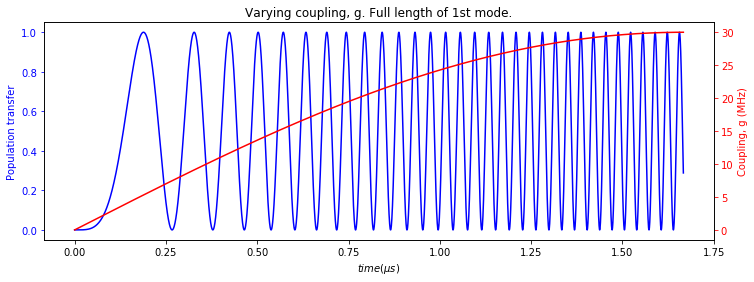

In [36]:
# Fundamental mode, full length
v = 3000
l = 5 *10**-3
t = l/v
g_max = 30 *10**6
steps = 5000
step_t = t/steps

g_arr = g_max*(np.abs(np.sin( np.linspace(0,pi/2,steps))))
t_arr = np.linspace(0,t,steps)

pop_transfer = []
for i, t_val in enumerate(t_arr):
    integral = np.sum(g_arr[:i])*step_t
    pop_trans = (np.cos(pi+2*pi* integral )+1)/2
    pop_transfer.append( pop_trans )

fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(t_arr*10**6, pop_transfer, 'b')
ax1.set_xlabel('$time (\mu s)$')
ax1.set_ylabel('Population transfer', color='b')
ax1.tick_params('y', colors='b')
ax1.set_title('Varying coupling, g. Full length of 1st mode.')
ax2 = ax1.twinx()
ax2.plot(t_arr*10**6, g_arr/(10**6), 'r')
ax2.set_ylabel('Coupling, g (MHz)', color='r')
ax2.tick_params('y', colors='r')

N=count_oscillations(pop_transfer)
print('Constant g: ', N, 'oscillations')

Constant g:  33.0 oscillations


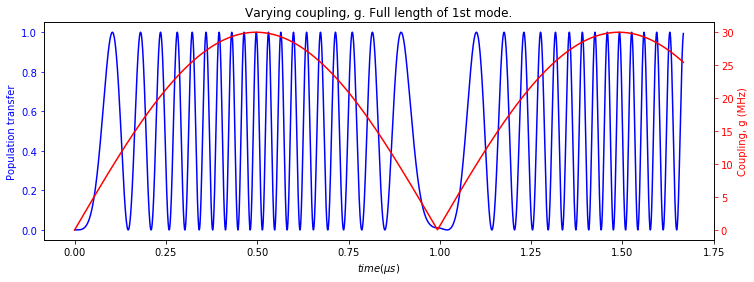

In [38]:
# 3rd harmonic 5000 of 7450 um of length
v = 3000
l = 5 *10**-3
t = l/v
g_max = 30 *10**6
steps = 5000
step_t = t/steps

frac_len = 5000/7450
num_wavelengths = 5/4
g_arr = g_max*(np.abs(np.sin( np.linspace(0,2*pi*num_wavelengths*frac_len,steps))))
t_arr = np.linspace(0,t,steps)

pop_transfer = []
for i, t_val in enumerate(t_arr):
    integral = np.sum(g_arr[:i])*step_t
    pop_trans = (np.cos(pi+2*pi* integral )+1)/2
    pop_transfer.append( pop_trans )

fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(t_arr*10**6, pop_transfer, 'b')
ax1.set_xlabel('$time (\mu s)$')
ax1.set_ylabel('Population transfer', color='b')
ax1.tick_params('y', colors='b')
ax1.set_title('Varying coupling, g. Full length of 1st mode.')
ax2 = ax1.twinx()
ax2.plot(t_arr*10**6, g_arr/(10**6), 'r')
ax2.set_ylabel('Coupling, g (MHz)', color='r')
ax2.tick_params('y', colors='r')

N=count_oscillations(pop_transfer)
print('Constant g: ', N, 'oscillations')